## Natural Language Processing for implementing 'bairro' tag in telegram messages

### Setup MinIo

In [1]:
from minio import Minio
from dotenv import load_dotenv
import os
import json
import pandas as pd

load_dotenv()

minio_client = Minio(
    endpoint=os.getenv("MINIO_ENDPOINT"),
    access_key=os.getenv("MINIO_ACCESS_KEY"), 
    secret_key=os.getenv("MINIO_SECRET_KEY"), 
    secure=False 
)
bucket_name = os.getenv("MINIO_BUCKET_NAME")


In [2]:
pasta_prefix = "Portalnoticiasceara/uf/ceara/fortaleza/bairros" 

In [3]:
def get_dataframe_minio(prefix: str):
    list_objects = minio_client.list_objects(bucket_name, prefix=pasta_prefix, recursive=True)
    objetos = [minio_client.get_object(bucket_name=bucket_name, object_name=obj.object_name) for obj in list_objects if obj.object_name.endswith('.json')]
    dataframes = []
    for response in objetos:
        data = response.read().decode('utf-8')
        
        json_data = json.loads(data)
        df = pd.json_normalize(json_data)
        dataframes.append(df)  
    return pd.concat(dataframes, ignore_index=True)  

In [4]:
df = get_dataframe_minio(prefix=pasta_prefix)

In [5]:
df.shape

(971, 6)

In [6]:
df.describe()

,id
count,971.000000
mean,4103.076210
std,1712.908593
min,1027.000000
25%,2614.000000
50%,4147.000000
75%,5627.000000
max,6957.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          971 non-null    int64 
 1   mensagem    971 non-null    object
 2   data        971 non-null    object
 3   media_path  971 non-null    object
 4   faccao      371 non-null    object
 5   bairro      971 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.6+ KB


In [7]:
df.isnull().sum()

id              0
mensagem        0
data            0
media_path    971
faccao        600
bairro          0
dtype: int64

array([[<Axes: title={'center': 'id'}>]], dtype=object)

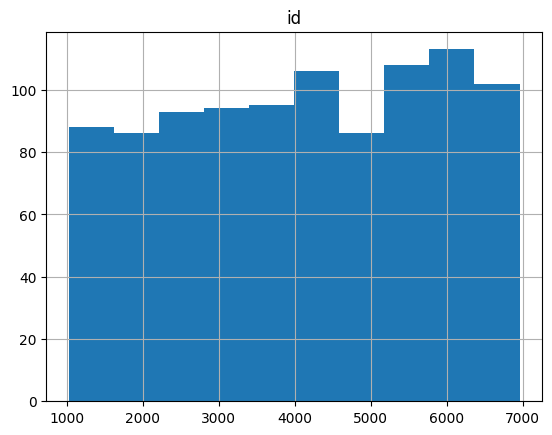

In [ ]:
df.hist()